In [1]:
import numpy as np

import random
import os
import sys
sys.path.insert(0, '../')

from constants import *

import features.sepsis_mimic3_myfunction as mimic3_myfunc
import visualization.sepsis_mimic3_myfunction_patientlevel import as mimic3_myfunc_patientlevel
import from visualization.plot_functions as plot_functions
import visualization.table_functions as  table_functions

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
if __name__ == '__main__':


    print("Collecting results at setting x,y,T=24,12,6 from three models", MODELS[0])
    
    current_data='blood_culture_data/'

    Root_Data,_,Output_predictions,Output_results=mimic3_myfunc.folders(current_data,model=MODELS[0])
    Root_Data=DATA_processed+'blood_culture_data/'
    Data_Dir=Root_Data+'experiments_24_12/test/'
    
    print("The interim results will be collected from ", Output_predictions)
    
    
    n,k,model=100,5,models[0]

        
    print("Now Collecting results from model", model)
        
    labels_list=[]
    probs_list=[]
    test_indices_list=[]
    tprs_list=[]
    pres_list=[]
    preds_septic_perpatient_list_list=[]
    icuid_sequence_list=[]
    for definition in definitions:
        
            labels_now=np.load(Data_Dir+'label'+definition[1:]+'_6.npy')    
            probs_now=np.load(Output_predictions+'prob_preds_'+str(x)+'_'+str(y)+'_'+str(a1)+'_'+definition[1:]+'.npy')
        
            icu_lengths_now=np.load(Data_Dir+'icustay_lengths'+definition[1:]+'.npy')        
            icustay_fullindices_now=patient_idx(icu_lengths_now)
                        
            labels_list.append(labels_now)
            probs_list.append(probs_now)
            test_indices_list.append(icustay_fullindices_now)

            icusid_seq=np.load(Data_Dir+'icustay_id'+definition[1:]+'.npy')
            icuid_sequence_list.append(icusid_seq)

    

    
    ######### Patient level auc plots/tables #################
            print("Patient level now for ",definition)
            CMs,_,preds_septic_perpatient_list=mimic3_myfunc_patientlevel.suboptimal_choice_patient_test(labels_now, probs_now,\
                                                                          icustay_fullindices_now,\
                                                                          icuid_seq=None, a1=6, n=20)
            tprs,_,_,pres,_=mimic3_myfunc_patientlevel.decompose_cms(CMs)
            
            tprs_list.append(tprs)
            pres_list.append(pres)
            
            preds_septic_perpatient_list_list.append(preds_septic_perpatient_list)

The interim results will be collected from  /scratch/wuy/Mimiciii_Sepsis_Label_Extraction/data/processed/blood_culture_data/experiments_24_12/test/
Directory  /scratch/wuy/Mimiciii_Sepsis_Label_Extraction/data/processed/blood_culture_data/plots/  already exists
Now Collecting results from model lgbm
Patient level now for  t_sofa


../../src/visualization/sepsis_mimic3_myfunction_patientlevel_clean.py:371: RuntimeWarning: invalid value encountered in long_scalars
  NPV = TN/(TN+FN)
../../src/visualization/sepsis_mimic3_myfunction_patientlevel_clean.py:369: RuntimeWarning: invalid value encountered in long_scalars
  PPV = TP/(TP+FP)
../../src/visualization/sepsis_mimic3_myfunction_patientlevel_clean.py:377: RuntimeWarning: invalid value encountered in long_scalars
  FDR = FP/(TP+FP)


Patient level now for  t_suspicion
Patient level now for  t_sepsis_min


In [4]:
precision,discard=100,-1
thresholds= np.arange(n*precision)[:discard*n]/precision/n

In [5]:
def_id=0
metric_list,metric_required=1-tprs_list[def_id],[0.85]
thred=mimic3_myfunc_patientlevel.output_at_metric_level(thresholds,metric_list,metric_required=metric_required)
print('Threshold at sensitivity level 0.85 is', thred)

preds=mimic3_myfunc_patientlevel.output_at_metric_level(preds_septic_perpatient_list_list[def_id],metric_list,metric_required=metric_required)

icustay_fullindices=test_indices_list[def_id]
labels=labels_list[def_id]
true_patient_list=np.array([int(np.sum(labels[icustay_fullindices[i]])>0) for i in range(len(icustay_fullindices))])

Threshold at sensitivity level 0.85 is 0.0796


current idx 197


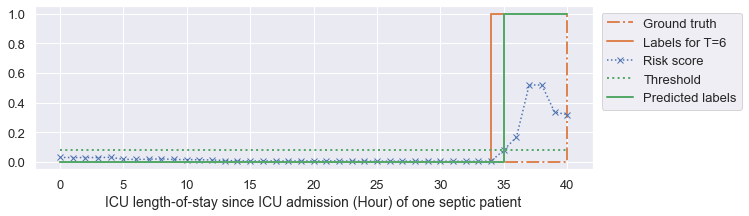

current idx 359


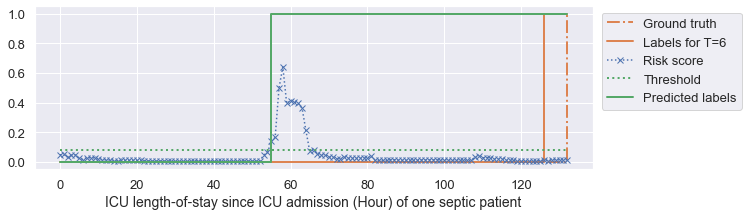

current idx 1038


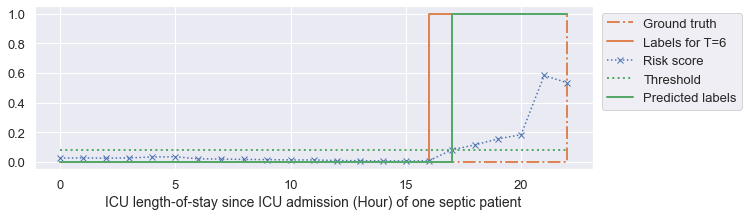

current idx 1203


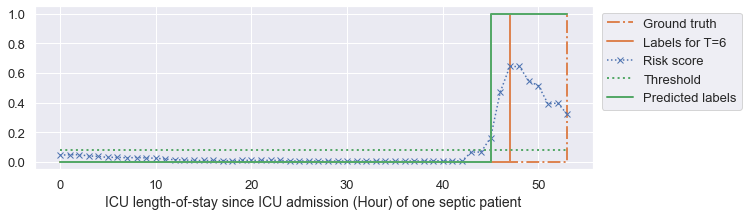

current idx 1247


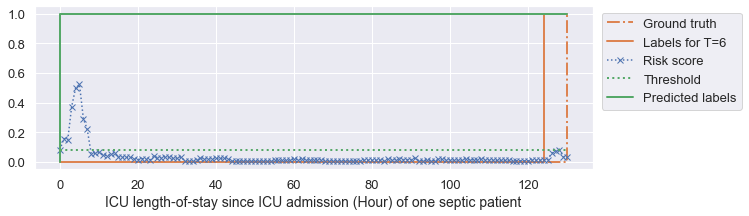

current idx 1298


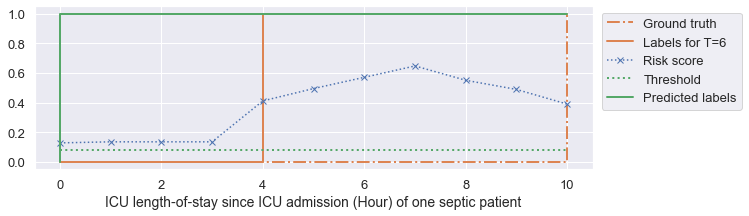

current idx 1560


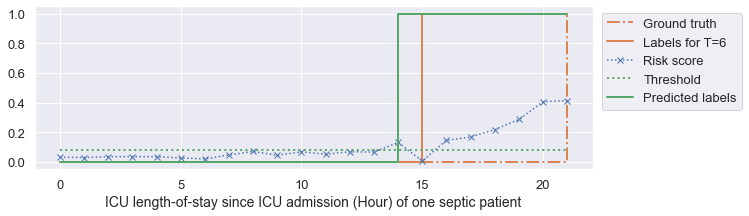

current idx 1599


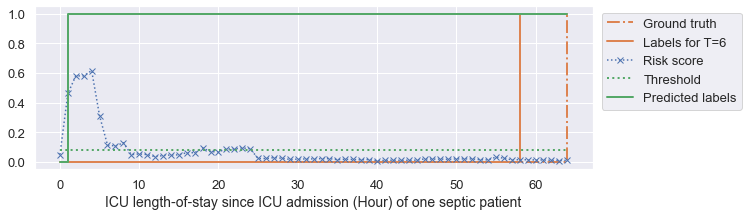

current idx 1604


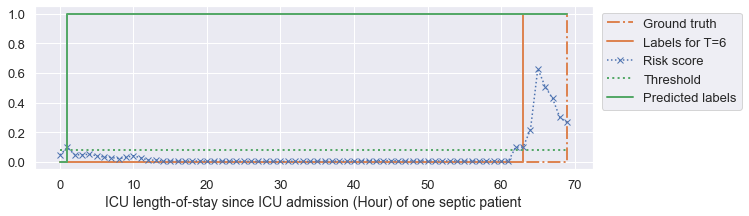

In [9]:
## to find the true septic patient
sepsis_ids=np.where(true_patient_list==1)[0]

##Plot the trajectory if it is above 10 hours
fontsize=12

for idx in sepsis_ids:
    
    if len(icustay_fullindices[idx])>10 and preds[idx]==1:
        
        print('current idx',idx)

        plot_functions.trajectory_plot(probs_list[def_id][icustay_fullindices[idx]],\
                        labels[icustay_fullindices[idx]],thred=thred)

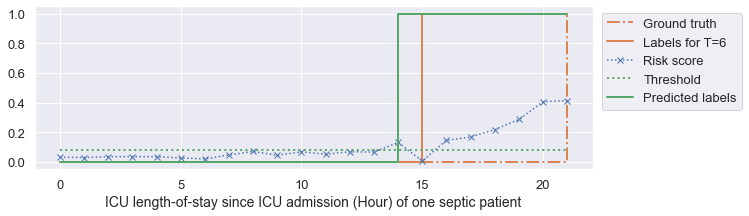

In [8]:
idx=1560
icuid=icuid_sequence_list[def_id][idx]

plot_functions.trajectory_plot(probs_list[def_id][icustay_fullindices[idx]],\
                        labels[icustay_fullindices[idx]],thred=thred)